# Lab 7 - Clustering Part I

## K-means clustering - example I

K-means clustering will divide data in k clusters, each with its own center. The algorithm works iteratively to group together data points that are spatially closer to one-another.

We will generate a synthetic data set that has natural clusters and then will use clustering functions to see how it works.

Here is the function that will create the synthetic data:

Ex.1 Please analyse the function parameters and generated output.

In [1]:
from sklearn.datasets import make_blobs 
 
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

Ex.2 Please call make_blob and generate a dataset with 120 samples, 2 features, 4 centres (clusters), and cluster_std=0.40. 

In [2]:
X, y = make_blobs(n_samples = 120, n_features = 2, centers = 4, cluster_std = 0.4)

Ex.3 Analyse the x and y shape.

In [3]:
print(X.shape)
print(y.shape)

(120, 2)
(120,)


Ex.4 Plot the data samples in X to see the clusters.

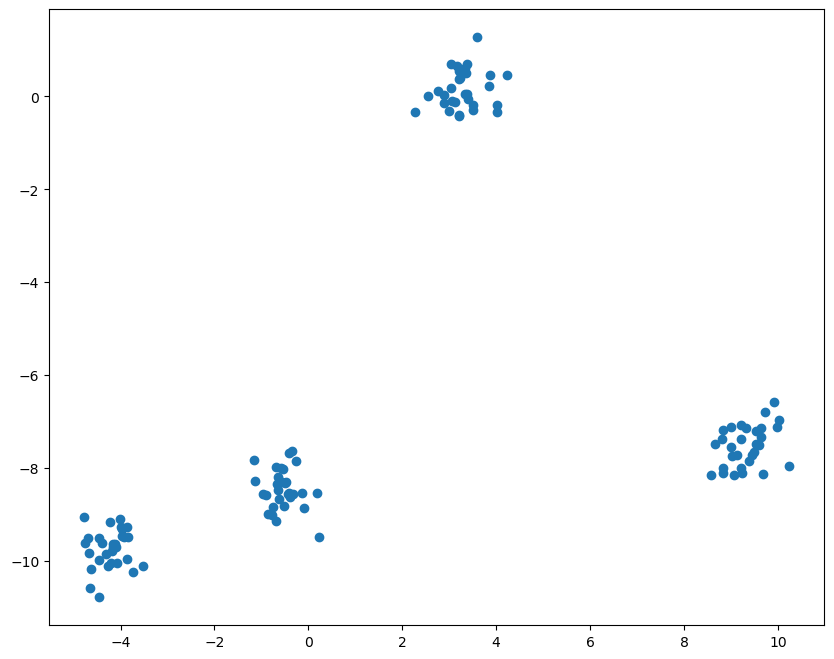

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1])

Ex.5 Run the implemented KMeans function K-Means, fit the model and predict the outcome.

In [5]:
from sklearn.cluster import KMeans

model = KMeans(init = "random", n_clusters = 4)
model.fit(X, y)
y_pred = model.predict(X)
y_pred

array([3, 0, 3, 2, 2, 1, 1, 1, 3, 0, 3, 2, 2, 1, 2, 1, 2, 3, 1, 0, 2, 3,
       3, 2, 1, 1, 0, 3, 1, 3, 3, 0, 1, 3, 0, 2, 0, 3, 2, 1, 1, 2, 2, 1,
       3, 2, 3, 0, 1, 0, 3, 2, 0, 2, 3, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1,
       0, 0, 2, 0, 0, 2, 0, 3, 3, 2, 0, 2, 3, 0, 1, 3, 1, 3, 3, 1, 3, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 3, 2, 0, 3, 3, 1, 3, 1,
       1, 2, 1, 2, 0, 3, 2, 1, 0, 3], dtype=int32)

Ex.6 Plot the results in order to see whether the clustering worked.

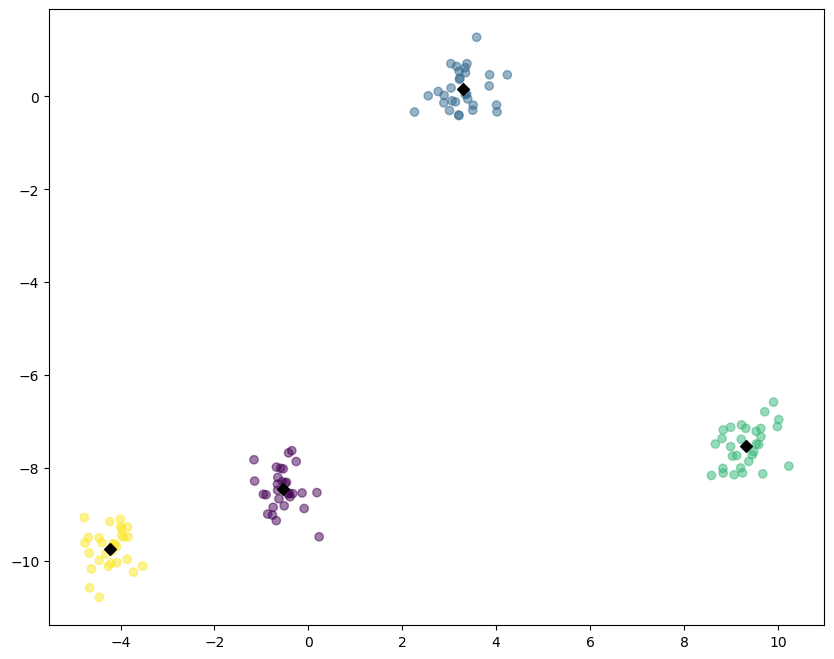

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, alpha = 0.5)

centroids = model.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.scatter(centroids_x, centroids_y, c = "black", marker = "D")
plt.show()

Ex.7 Calculate inertia Inertia_ or Dunn index Package jgmcvi (optional).

In [7]:
print("Inertia:", model.inertia_)

Inertia: 37.85131201944497


## K-means clustering - example II

Change the parameters of our data generation process to create different-looking clusters (eg. about 5 clusters and cluster_std=0.8).

In [8]:
X, y = make_blobs(n_samples = 120, n_features = 2, centers = 5, cluster_std = 0.8)

Ex.1 Plot the data

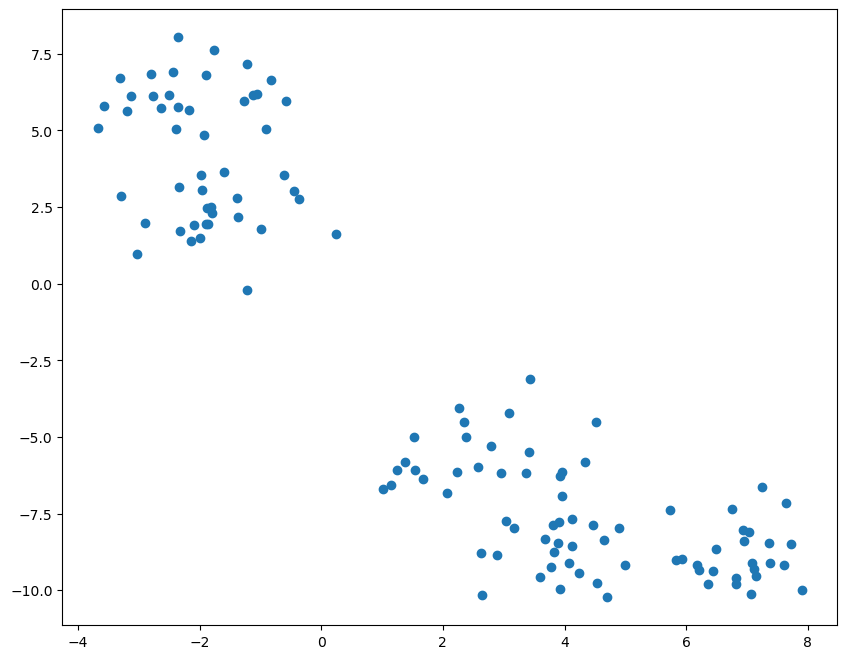

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1])

Ex.2 Predict for the same nb. of clusters = 5.

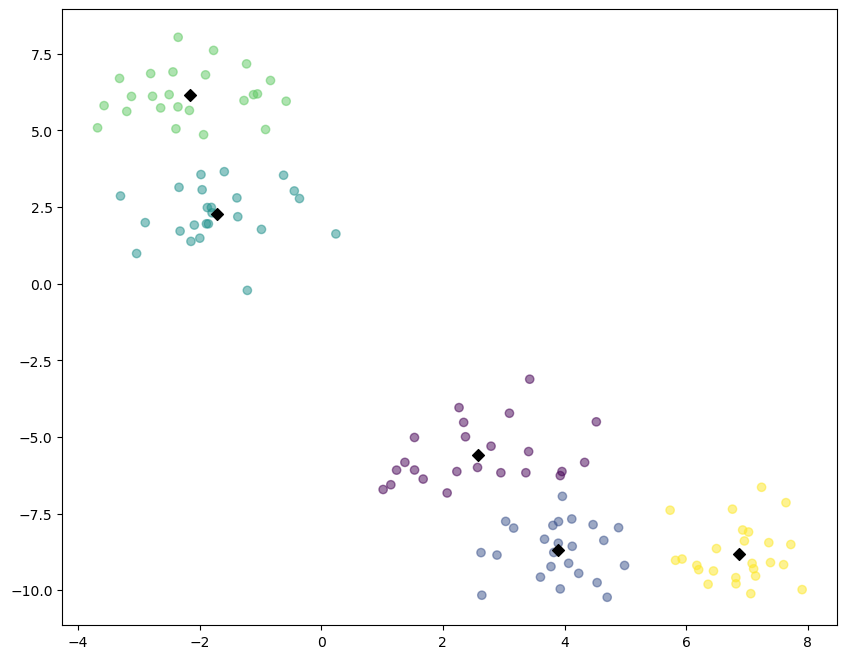

In [10]:
model_5 = KMeans(init = "random", n_clusters = 5)
model_5.fit(X, y)
y_pred = model_5.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, alpha = 0.5)

centroids = model_5.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.scatter(centroids_x, centroids_y, c = "black", marker = "D")
plt.show()

Ex.3 Predict for 2 instead of 5 clusters.

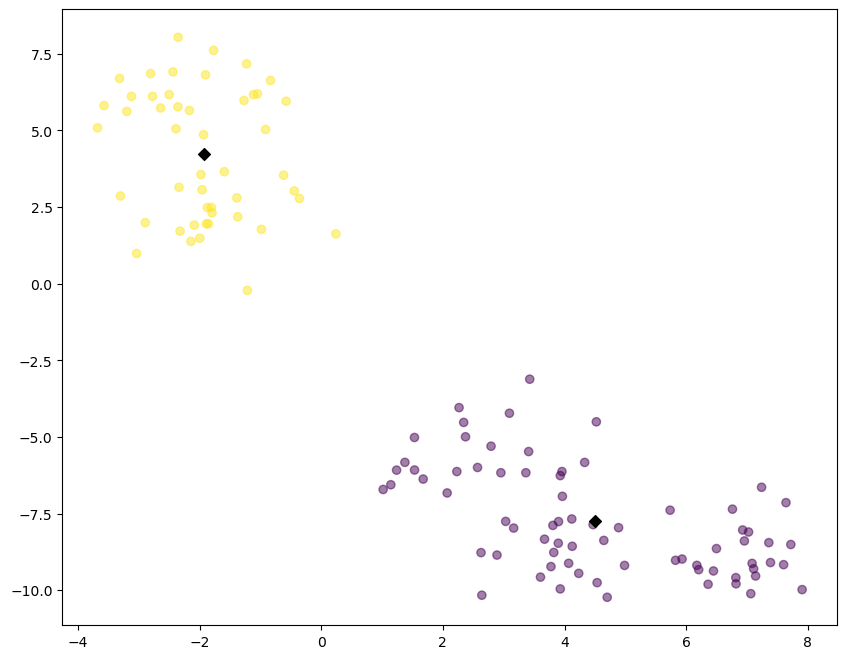

In [11]:
model_2 = KMeans(init = "random", n_clusters = 2)
model_2.fit(X, y)
y_pred = model_2.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, alpha = 0.5)

centroids = model_2.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.scatter(centroids_x, centroids_y, c = "black", marker = "D")
plt.show()

Ex.4 Calculate inertia or Dunn index (optiona).

In [12]:
print("Inertia with 5 clusters:", model_5.inertia_)
print("Inertia with 2 clusters:", model_2.inertia_)

Inertia with 5 clusters: 171.2366046366804
Inertia with 2 clusters: 747.9845517403087


## K-means ++

Remember how we randomly initialize the centroids in k-means clustering? This is also potentially problematic because we might get different clusters every time. So, to solve this problem of random initialization, there is an algorithm called K-Means++ that can be used to choose the initial values (discussed during the lecture). In latest version of sklearn library kmeans++ method is the default version. In this case, change it to a random one and compare the results.

Ex.1 Run K-Means for the previous ex. while changing the parameter in KMeans function:

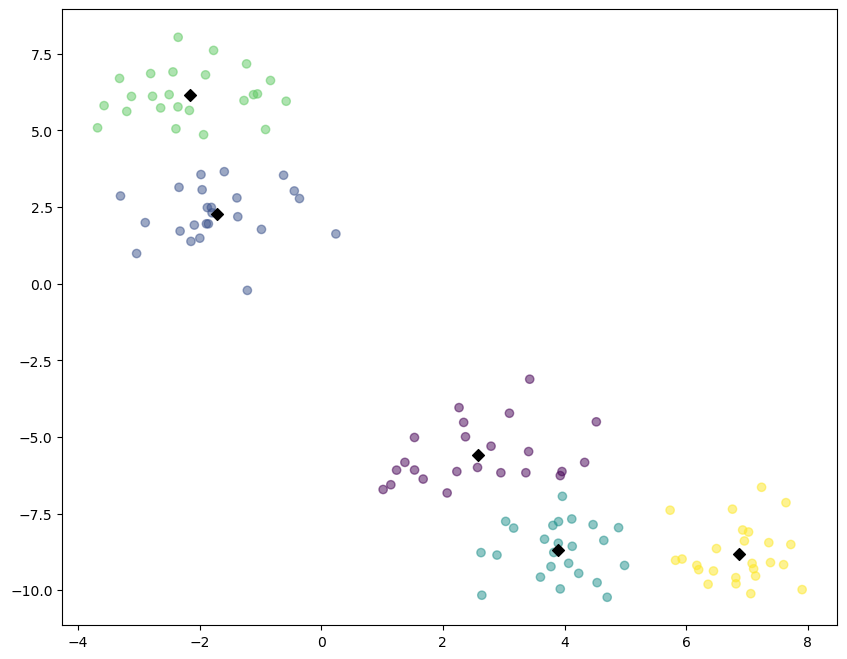

In [13]:
# With 5 clusters

model_5_plus = KMeans(init = "k-means++", n_clusters = 5)
model_5_plus.fit(X, y)
y_pred = model_5_plus.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, alpha = 0.5)

centroids = model_5_plus.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.scatter(centroids_x, centroids_y, c = "black", marker = "D")
plt.show()

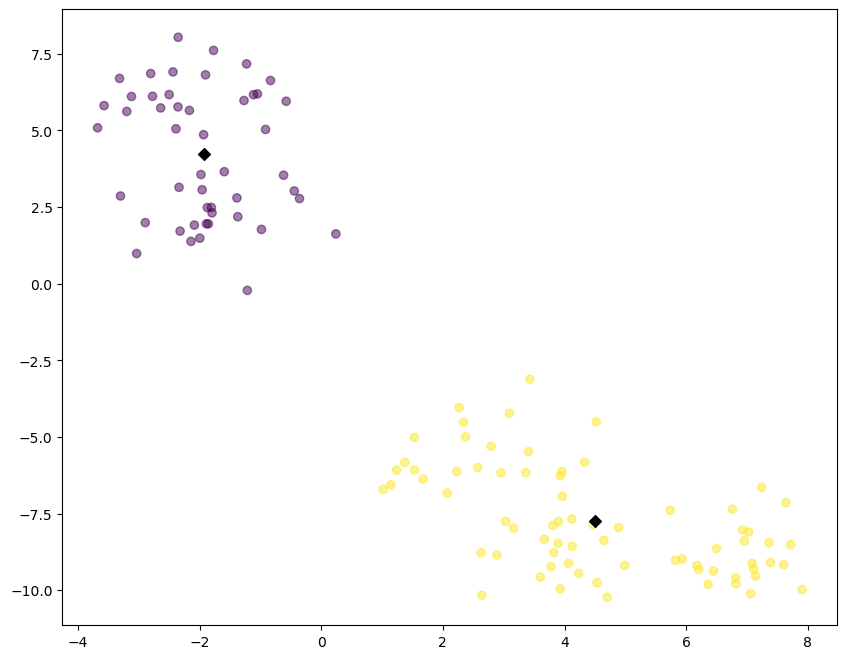

In [14]:
# With 2 clusters

model_2_plus = KMeans(init = "k-means++", n_clusters = 2)
model_2_plus.fit(X, y)
y_pred = model_2_plus.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, alpha = 0.5)

centroids = model_2_plus.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.scatter(centroids_x, centroids_y, c = "black", marker = "D")
plt.show()

In [15]:
print("Inertia with 5 clusters:", model_5.inertia_)
print("Inertia with 5 clusters (K-means ++):", model_5_plus.inertia_)
print(" ")
print("Inertia with 2 clusters:", model_2.inertia_)
print("Inertia with 2 clusters (K-means ++):", model_2_plus.inertia_)

Inertia with 5 clusters: 171.2366046366804
Inertia with 5 clusters (K-means ++): 171.2366046366804
 
Inertia with 2 clusters: 747.9845517403087
Inertia with 2 clusters (K-means ++): 747.9845517403087


## Elbow method

Please implement the elbow method to choose the correct parameter value for k.

Ex.1 Run K-Means for a range of clusters using a for loop and collecting the distortions (inertia) into a list.

Ex.2 Plot the distortions of K-Means.

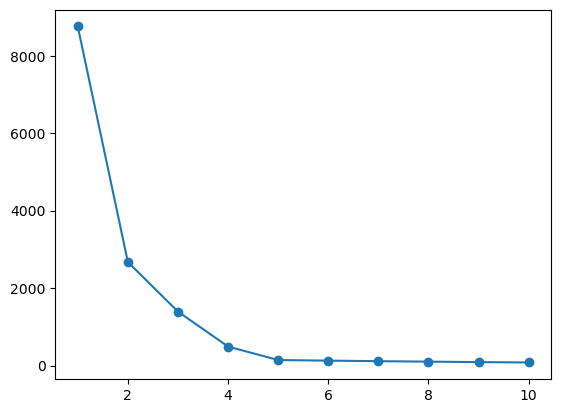

In [16]:
X, y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)

inertia = []

for i in range(1, 11):
    model = KMeans(init = "k-means++", n_clusters = i)
    model.fit(X, y)
    inertia.append(model.inertia_)

plt.plot(range(1, 11), inertia, marker = "o")

Maximum number of a clusters is 20 Please check whether the K-Means algorithm will correctly cluster the data:

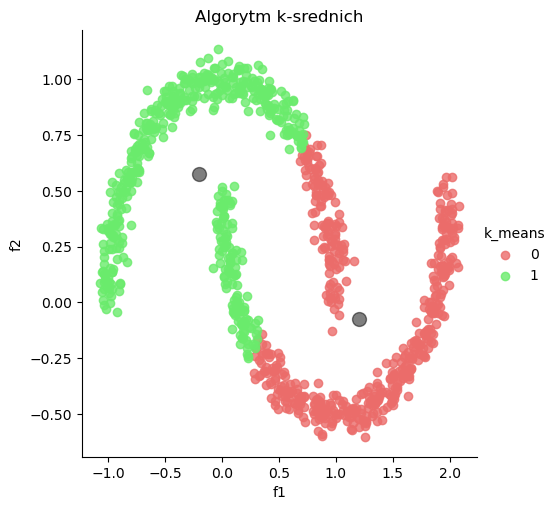

In [17]:
from sklearn.datasets import make_moons
import seaborn as sns
import pandas as pd
 
X, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(X, columns = ['f1','f2'])

#TODO: Kmeans
model = KMeans(init = 'k-means++', n_clusters = 2)
model.fit(X, y)
y_pred = model.predict(X)
centers = model.cluster_centers_

#Plot
X_moon['k_means'] = y_pred
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

# Lab 8 - Clustering Part II

## Clustering II - hierarchical methods

### Dendrograms

The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children. The top of the U-link indicates a cluster merge. The two legs of the U-link indicate which clusters were merged. The length of the two legs of the U-link represents the distance between the child clusters. It is also the cophenetic distance between original observations in the two children clusters.

Dataset:
Create the dataset using make blobs function:

In [18]:
from sklearn.datasets import make_blobs 
 
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.8, random_state=0)

Ex.1 Plot the data.

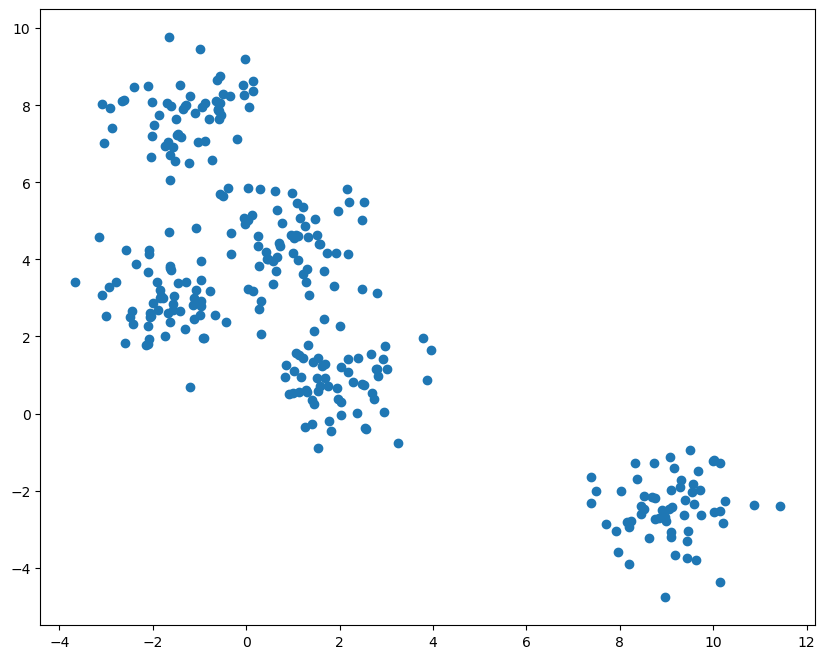

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1])

Ex.2 Use the Means function with k=2 to assign points to clusters.

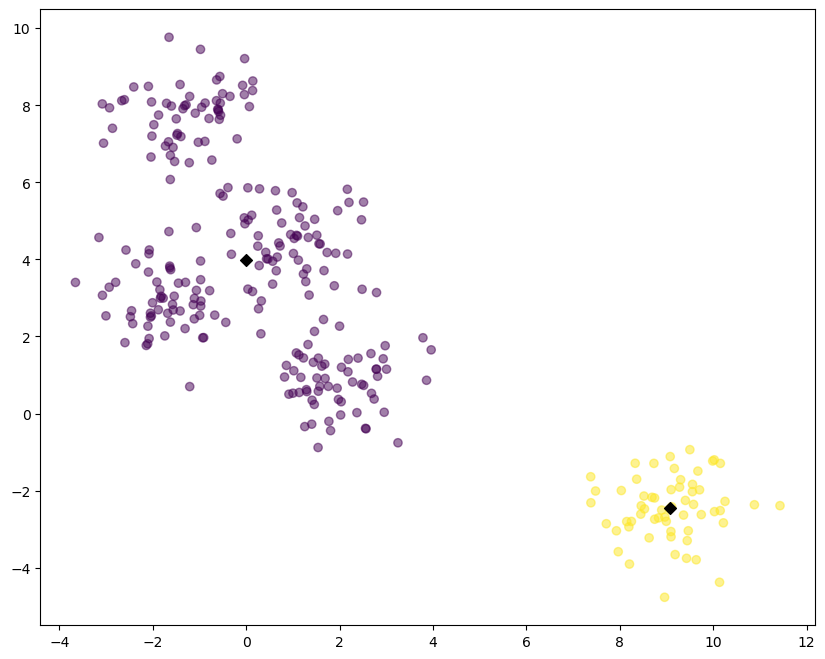

In [20]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 2)
model.fit(X, y_true)
y_pred = model.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, alpha = 0.5)

centroids = model.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.scatter(centroids_x, centroids_y, c = "black", marker = "D")
plt.show()

In Kmeans clustering, we provide the number of clusters and then the algorithm partitions the data. In agglomerative clustering, the data is grouped together based on the distance, and we can decide how many clusters we want, once we see how the data are grouped together.

Ex.3 Use the scipy libraries to draw the dendrogram for the data:

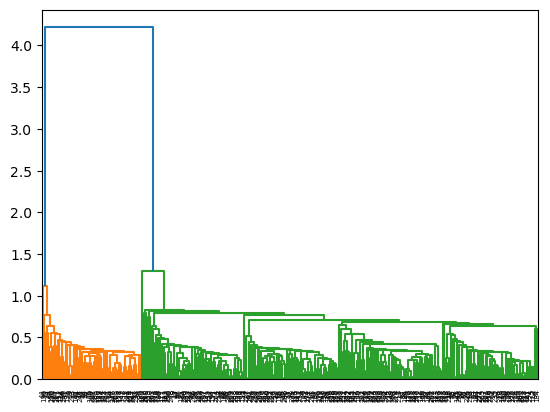

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

link = linkage(X)
den = dendrogram(link)

Ex.4 Something this makes clear is that visualizing the dengrogram is useful, but it's not for big dataset. Create a smaller dataset to draw a dendogram.

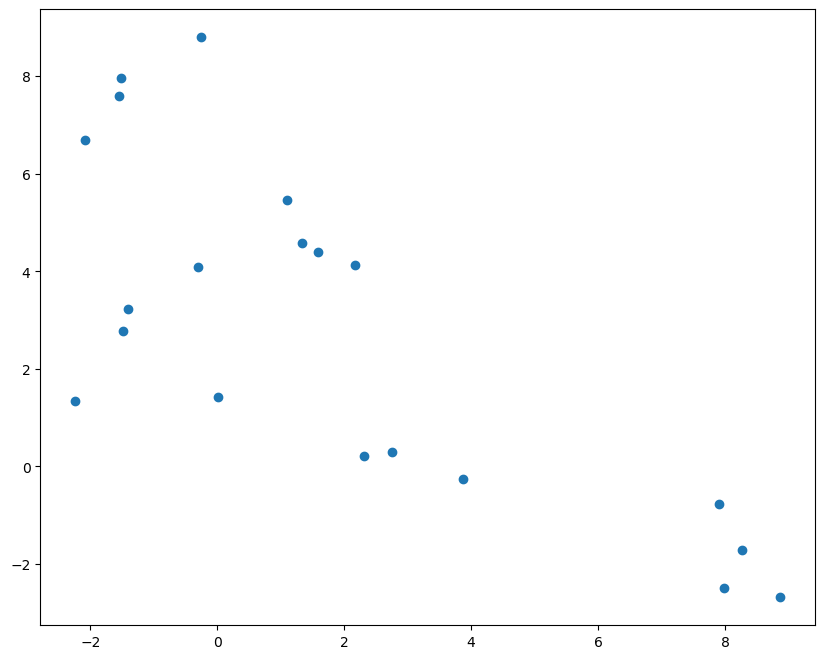

In [22]:
X, y_true = make_blobs(n_samples=20, centers=5, cluster_std=0.8, random_state=0)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1])

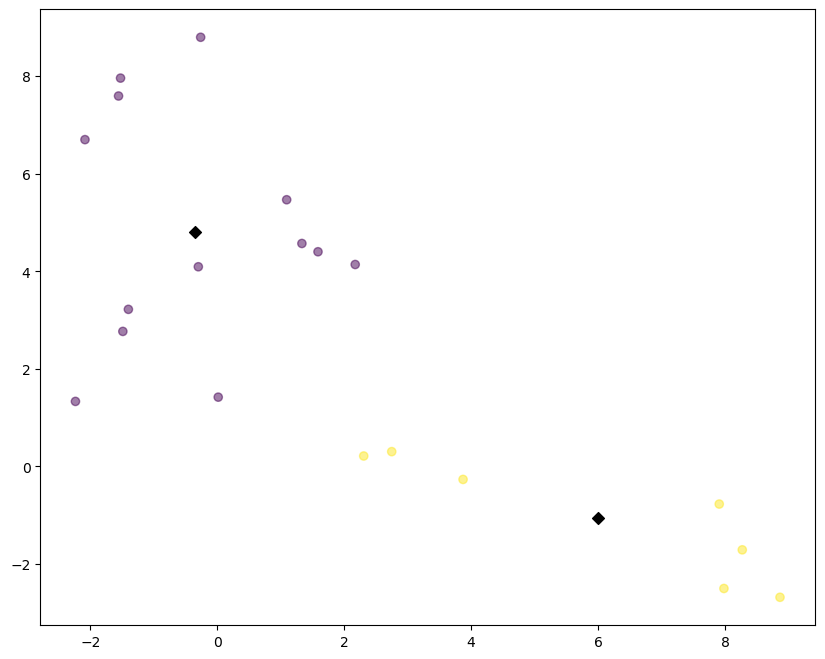

In [23]:
model = KMeans(n_clusters = 2)
model.fit(X, y_true)
y_pred = model.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, alpha = 0.5)

centroids = model.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.scatter(centroids_x, centroids_y, c = "black", marker = "D")
plt.show()

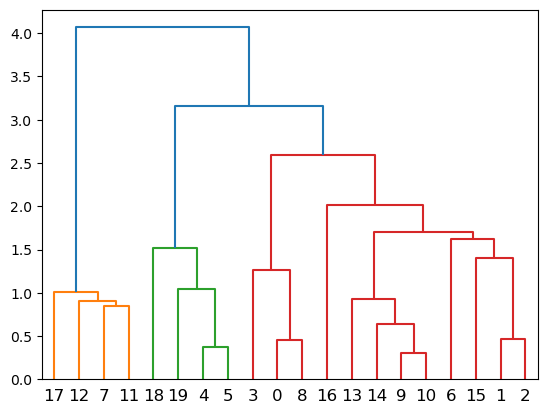

In [24]:
link = linkage(X)
den = dendrogram(link)

### Agglomerative clustering

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. 

There are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

In this ex. we will focus on agglomerative clustering.



Ex.5 Please read the dataset and choose columns to further analysis. The dataset contains 200 records and 5 attributes. Use only Annual Income (in thousands of dollars) and Spending Score (1-100) columns for clustering.

In [25]:
import pandas as pd

df = pd.read_csv("shopping_data.csv")
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [26]:
X = df.iloc[:, 3:5]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Ex.6 Create a dendrogram to chose the appropriate k value.

Ex.7 Analyse results for different linkage values - single, average,complete linkage and Ward. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters. (pl. Celem zadania będzie porównanie działania metody średnich połączeń (ang. avarage linkage), metody Warda, pojedynczego połączenia (ang. single linkage) oraz pełnego wiązania (ang. complete linkage).).

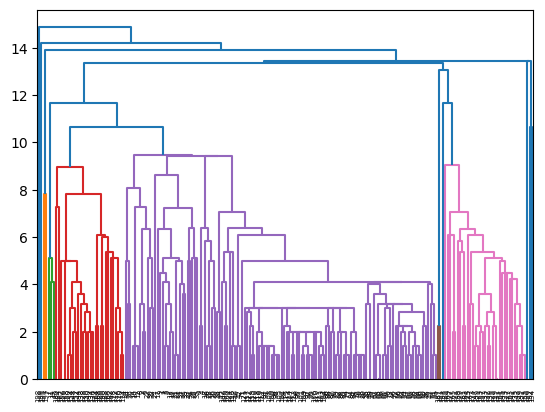

In [27]:
lnk = linkage(X, method='single')
dnd = dendrogram(lnk)

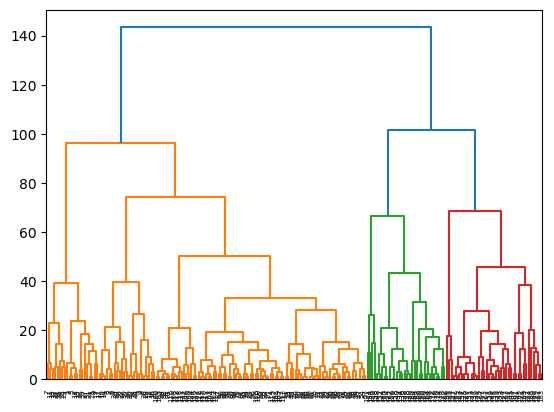

In [28]:
lnk = linkage(X, method='complete')
dnd = dendrogram(lnk)

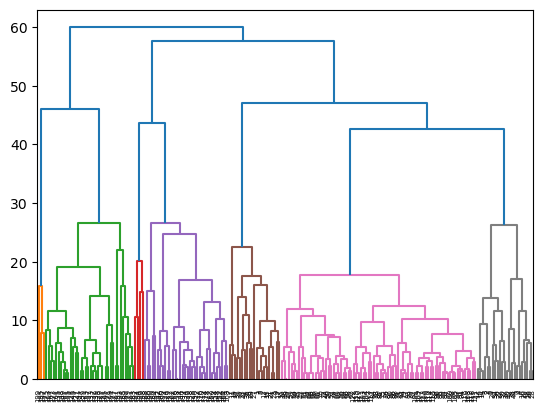

In [29]:
lnk = linkage(X, method='average')
dnd = dendrogram(lnk)

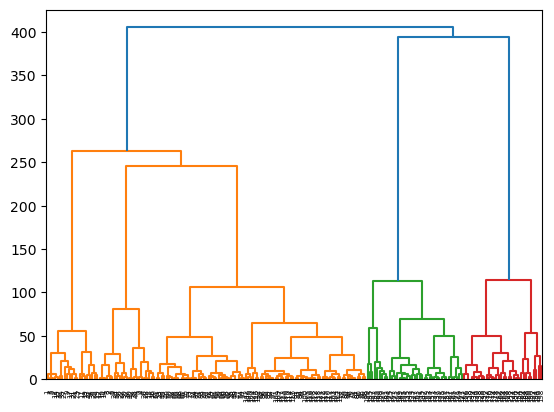

In [30]:
lnk = linkage(X, method='ward')
dnd = dendrogram(lnk)

Ex.8 Use the AgglomerativeClustering class of the sklearn.cluster library to build the model predict clusters.

Ex.9 Plot the clusters to see how actually our data has been clustered.

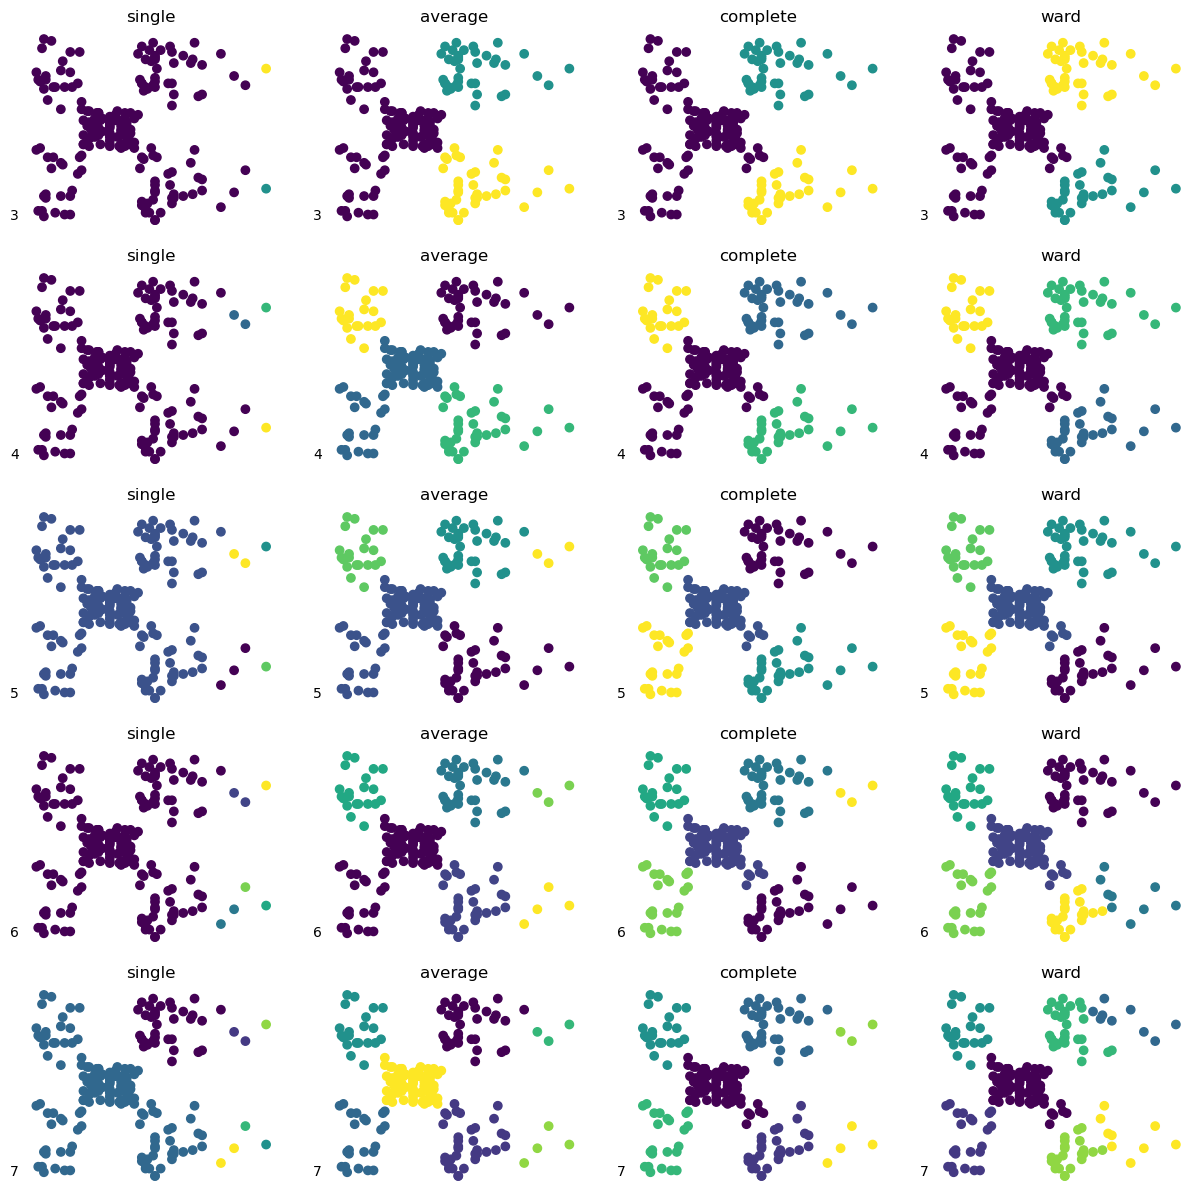

In [31]:
from sklearn.cluster import AgglomerativeClustering
import time
import numpy as np

linkages = ["single", "average", "complete", "ward"]

X = np.array(X)
plt.figure(figsize=(15,15))
temp = 1

for n_clusters in range(3, 8):
    for linkage in linkages:
        algorithm = AgglomerativeClustering(n_clusters = n_clusters, linkage = linkage)
        algorithm.fit(X)

        plt.subplot(5, len(linkages), temp)
        plt.title(linkage, size = 12)
        plt.scatter(X[:, 0], X[:, 1], c=algorithm.labels_)
        plt.text(1, 1, n_clusters, size=10)
        plt.axis('off')
        temp += 1

From the plot above, I would say that with n_cluster = 5 and "complete" or "Ward" linkage method have the best result.

### Selecting the number of clusters with silhouette analysis on KMeans clustering

During our last meeting you have used the elbow method to asses the quality of the clusters.
Today we will use the silhouette analysis on KMeans clustering to assess the clusters and choose the right k value more.

Ex.1 Create the dataset:

In [32]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

Ex.2 Determine the cluster range [2,3….]

Ex.3 Iterate for all the values in cluster range:

- Perform k-Means
- Calculate and print the silhouette_score
- Compute the silhouette scores for each sample
- Aggregate the silhouette scores for samples belonging to cluster i, sort them and plot (visualization the result)
- Have a look here to check you solution and plot the silhouette plot

For n_clusters = 2 The average silhouette_score is : 0.7049787496083261
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


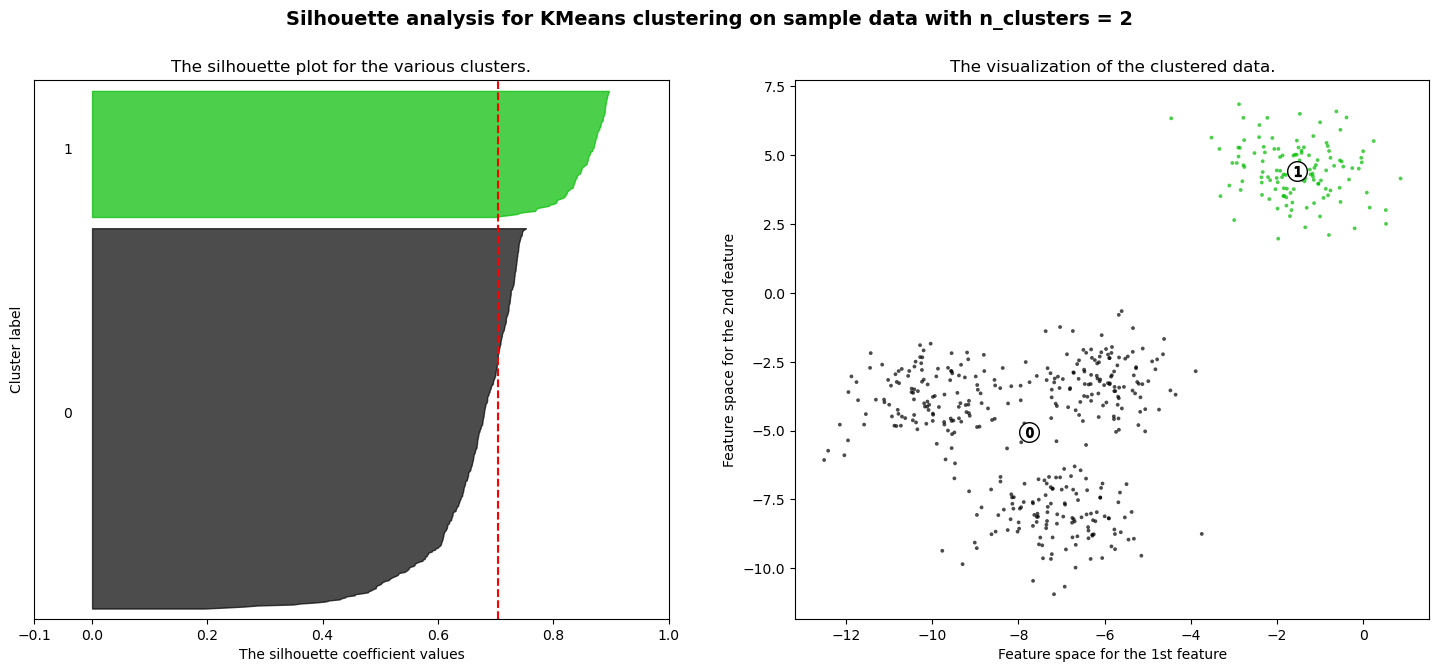

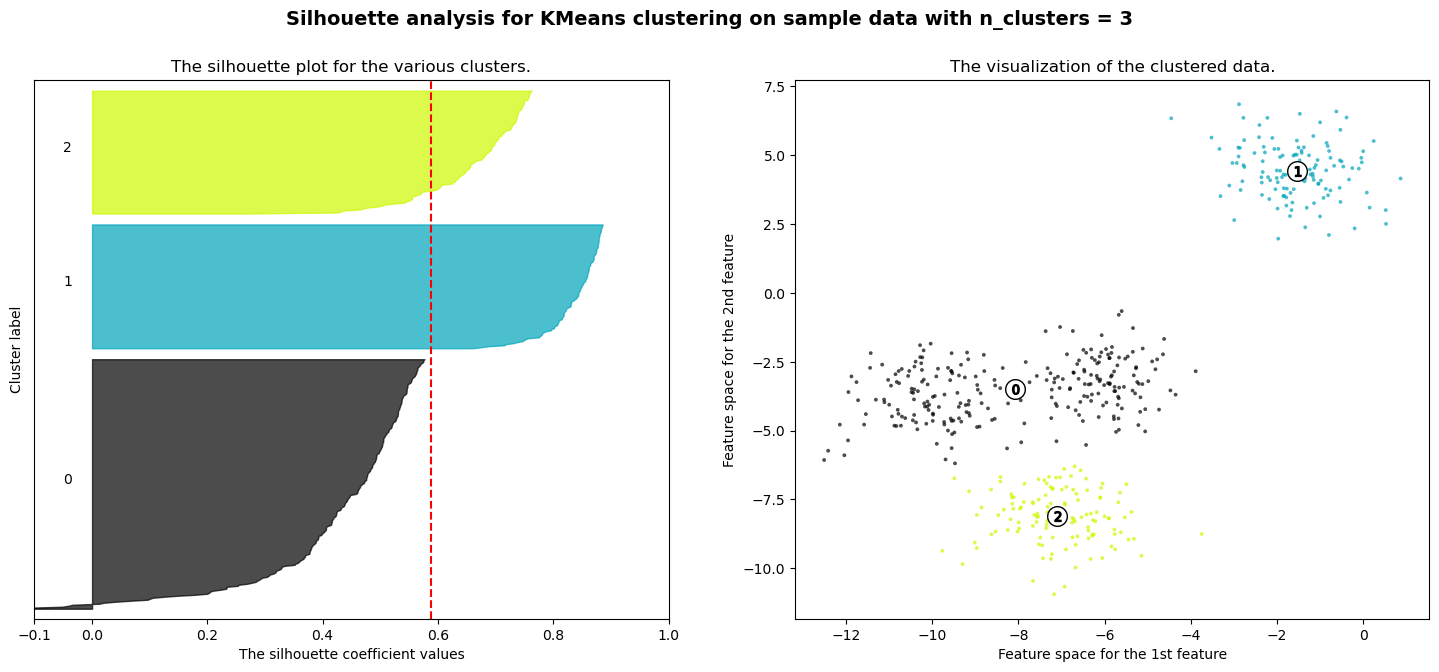

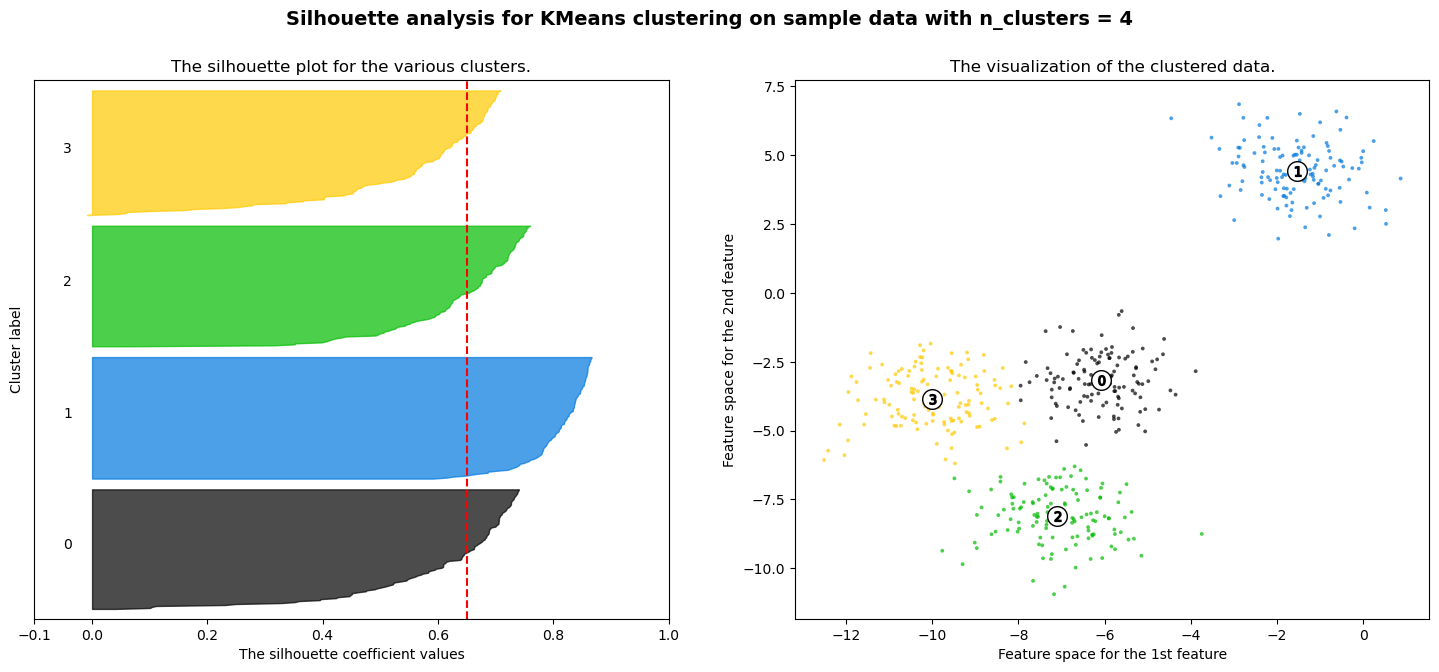

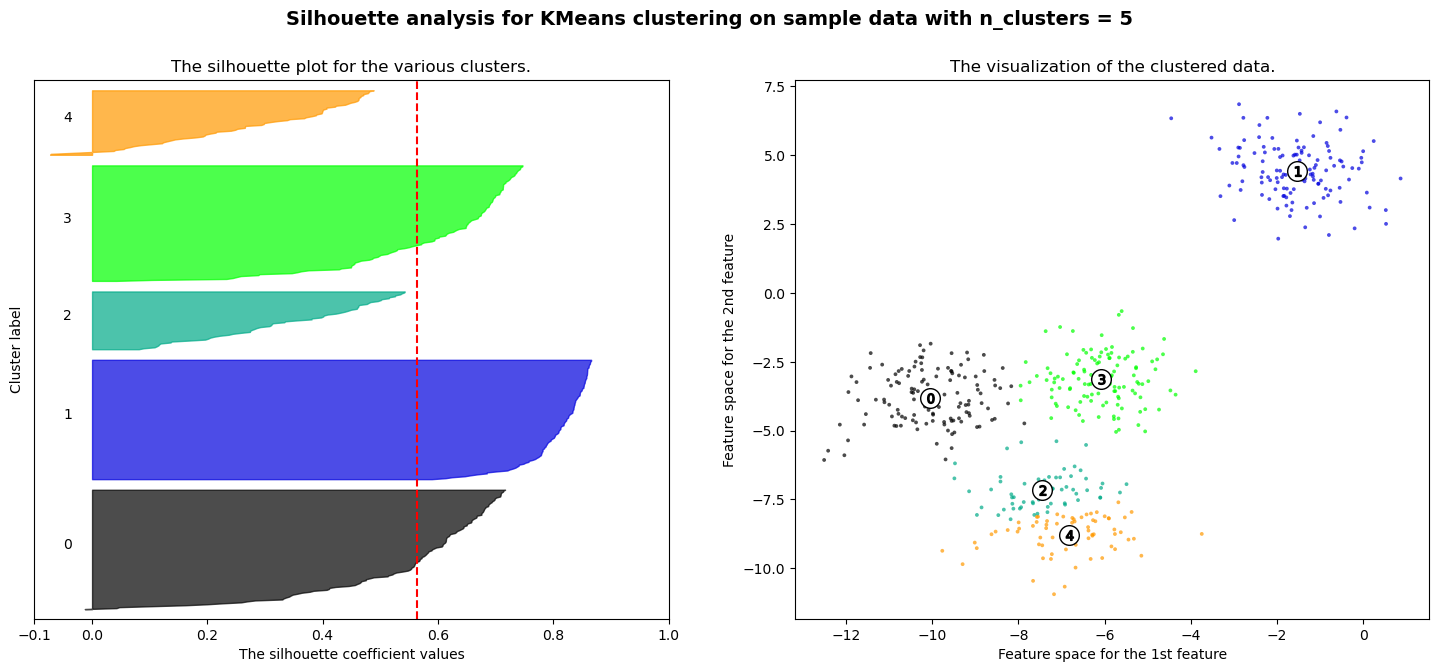

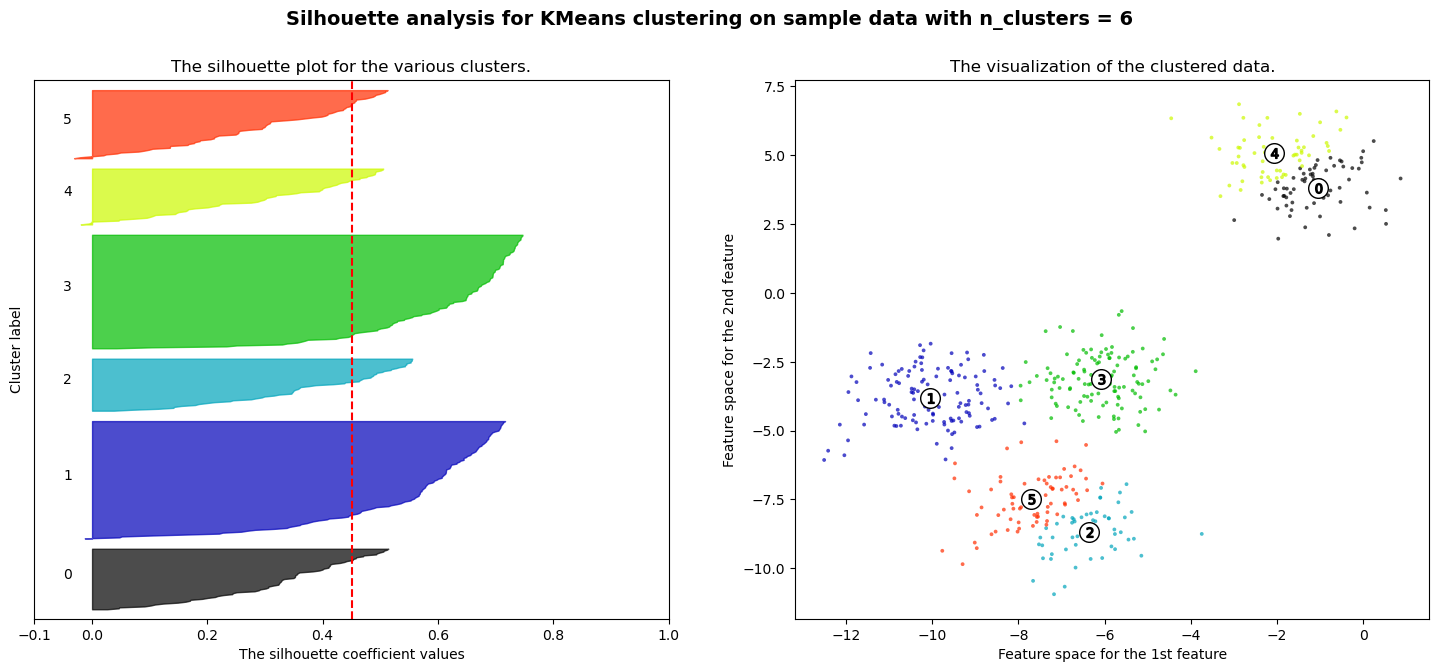

In [33]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()